In [1]:
import numpy as np
import matplotlib.pyplot as plt

from openmm import unit
from openmmtools.constants import kB

temperature = 300.0 * unit.kelvin
kT = kB * temperature
beta = 1.0/kT

In [2]:
# Define alchemical and rest lambda functions
T_max = 600.0 * unit.kelvin 
beta_m = 1.0 / (kB * T_max)

functions = {"alchemical": lambda x : x,
             "rest": lambda x : -2*(1 - np.sqrt(beta_m/beta))*x + 1 if x < 0.5 else 2*(1 - np.sqrt(beta_m/beta))*x - 1 + 2*np.sqrt(beta_m/beta)
            }

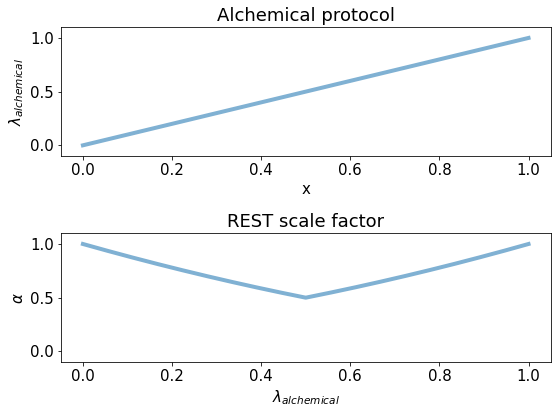

In [4]:
# Set figure size
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6), squeeze=True)

# Set font size
plt.rc('font', size=15) 

# Plot
global_lambda = np.linspace(0.,1.,2500)
for i, f in enumerate(functions):
    x = global_lambda
    if f == 'rest':
        y = [functions[f](l) * functions[f](l) for l in global_lambda]
        axes[i].plot(x, y, linewidth=4, color="#80b1d3")
    else:
        y = [functions[f](l) for l in global_lambda]
        axes[i].plot(x, y, linewidth=4, color="#80b1d3")

# Set axis labels
axes[0].set_xlabel("x")
axes[1].set_xlabel(r"$\lambda_{alchemical}$")
labels = [r"$\lambda_{alchemical}$", r"$\alpha$"]
for label, ax in zip(labels, axes):
    ax.set_ylabel(label)
    ax.set_ylim([-0.1, 1.1])
    
# Set title
axes[0].set_title('Alchemical protocol')
axes[1].set_title('REST scale factor')

# Ensure x-axis labels are not cut off
plt.tight_layout()

# Save plot as pdf
save_path = "/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/protocols.pdf"
plt.savefig(save_path, dpi=500)
